In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt

# Interpolation in 1D using Python

Create array of x coordinates and evaluate a known function at each `x[i]`.

In [5]:
x_start = 0.0
x_end = 10.0;
numpoints = 10
dx = (x_end - x_start)/float(numpoints - 1)

x = numpy.zeros(numpoints)
for i in range(numpoints):
    x[i] = x_start + i * dx

f = numpy.cos(-x**2 / 9.0)

Create a very fine sampling of coordinates to evaluate exact function and interpolation approximation on. We call these the evaluation points.

In [8]:
numpoints_eval = 128
dx_eval = (x_end - x_start)/float(numpoints_eval - 1)

x_eval = numpy.zeros(numpoints_eval)
for i in range(numpoints_eval):
    x_eval[i] = x_start + i * dx_eval

In [10]:
f_eval = numpy.cos(-x_eval**2 / 9.0)

---

## Linear interpolation example

Create an interpolation function like $P_1$ and evaluate it at all evaluation points in `x_eval`.

In [13]:
f_eval_linear_interp = numpy.interp(x_eval, x, f)

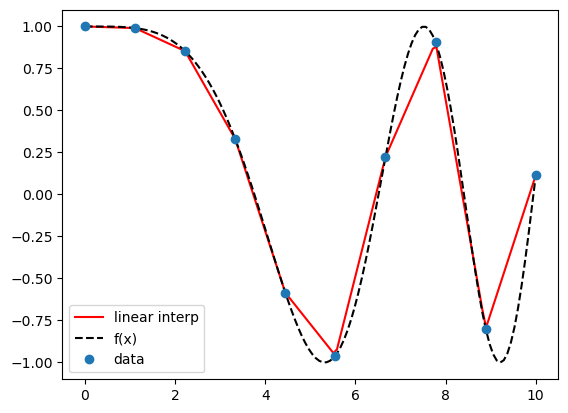

In [15]:
plt.plot(x_eval, f_eval_linear_interp, '-r', label='linear interp')
plt.plot(x_eval, f_eval, '--k', label='f(x)')
plt.plot(x, f, 'o', label='data')
plt.legend(loc='best');

---

## Cubic spline interpolation example

Now perform the interpolation using cubic splines.

First we import the necessary function `scipy.interpolate`

In [18]:
from scipy.interpolate import CubicSpline

We create the spline object using our original (coarse) sample points

In [21]:
cubic_spl_interpolant = CubicSpline(x, f)

Lastly we evaluate the spline interpolator at the dense evaluation points

In [24]:
f_eval_cubic_spline = cubic_spl_interpolant(x_eval)

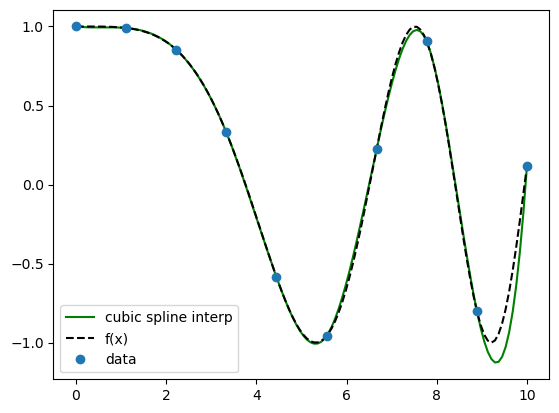

In [26]:
plt.plot(x_eval, f_eval_cubic_spline, '-g', label='cubic spline interp')
plt.plot(x_eval, f_eval, '--k', label='f(x)')
plt.plot(x, f, 'o', label='data')
plt.legend(loc='best');